In [2]:
import audeer
import audonnx
import audinterface
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

OUTPUT_PATH = "/autofs/thau03a/datasets/c1_muse_perception/arousal_valence_dominance.csv"

In [1]:
url = 'https://zenodo.org/record/6221127/files/w2v2-L-robust-12.6bc4a7fd-1.1.0.zip'
cache_root = audeer.mkdir('../cache')
model_root = audeer.mkdir('../model')

archive_path = audeer.download_url(url, cache_root, verbose=True)
audeer.extract_archive(archive_path, model_root)
model = audonnx.load(model_root, device='cuda:0')

sampling_rate = 16000
signal = np.random.normal(size=sampling_rate).astype(np.float32)
model(signal, sampling_rate)

/autofs/thau03b/imartinf/MuSe-2024-THAU/.venv/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


{'hidden_states': array([[-0.00708522,  0.00618751, -0.00760817, ...,  0.00668752,
          0.009416  ,  0.00286449]], dtype=float32),
 'logits': array([[0.670963  , 0.63547176, 0.50528264]], dtype=float32)}

In [2]:
example_file = '/autofs/thau03a/datasets/c1_muse_perception/raw/wav/0.wav'
SAMPLE_RATE = 16000

In [3]:
interface = audinterface.Feature(
    model.labels('logits'),
    process_func=model,
    process_func_args={
        'outputs': 'logits',
    },
    sampling_rate=SAMPLE_RATE,
    resample=True,    
    verbose=True,
)

In [5]:
interface.process_signal(signal, SAMPLE_RATE)

,,arousal,dominance,valence
start,end,,,
0 days,0 days 00:00:01,0.670963,0.635472,0.505283


In [10]:
file_list = [os.path.join('/autofs/thau03a/datasets/c1_muse_perception/raw/wav/', f) for f in os.listdir('/autofs/thau03a/datasets/c1_muse_perception/raw/wav/') if f.endswith('.wav')]
results = interface.process_files(file_list)
results

,,,arousal,dominance,valence
file,start,end,,,
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/3.wav,0 days,0 days 00:00:30.101333333,0.472870,0.573901,0.600030
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/166.wav,0 days,0 days 00:00:30.037333333,0.503960,0.568677,0.357208
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/221.wav,0 days,0 days 00:00:30.229319728,0.688102,0.729627,0.526454
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/190.wav,0 days,0 days 00:00:30.037333333,0.383207,0.484323,0.415290
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/167.wav,0 days,0 days 00:00:30.037333333,0.536889,0.602038,0.586477
...,...,...,...,...,...
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/67.wav,0 days,0 days 00:00:41.706666667,0.552190,0.637641,0.591325
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/70.wav,0 days,0 days 00:00:30.037333333,0.402672,0.521754,0.563845
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/98.wav,0 days,0 days 00:00:30.037333333,0.475328,0.564278,0.625645


In [12]:
file_list[0].split('/')[-1].split('.')[0]

'3'

In [13]:
# Parse file to get subj_id
results["subj_id"] = [f.split('/')[-1].split('.')[0] for f in file_list]
results["subj_id"] = [int(f) for f in results["subj_id"]]
results.head()

,,,arousal,dominance,valence,subj_id
file,start,end,,,,
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/3.wav,0 days,0 days 00:00:30.101333333,0.472870,0.573901,0.600030,3
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/166.wav,0 days,0 days 00:00:30.037333333,0.503960,0.568677,0.357208,166
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/221.wav,0 days,0 days 00:00:30.229319728,0.688102,0.729627,0.526454,221
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/190.wav,0 days,0 days 00:00:30.037333333,0.383207,0.484323,0.415290,190
/autofs/thau03a/datasets/c1_muse_perception/raw/wav/167.wav,0 days,0 days 00:00:30.037333333,0.536889,0.602038,0.586477,167


In [18]:
results.to_csv(OUTPUT_PATH, index=False)

In [3]:
results = pd.read_csv(OUTPUT_PATH)

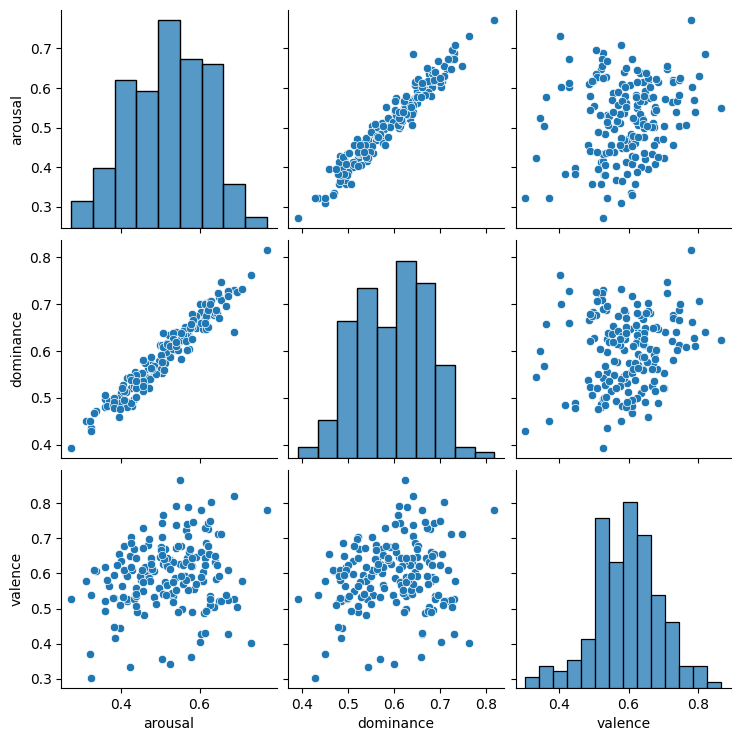

In [4]:
sns.pairplot(results.drop(columns="subj_id"))

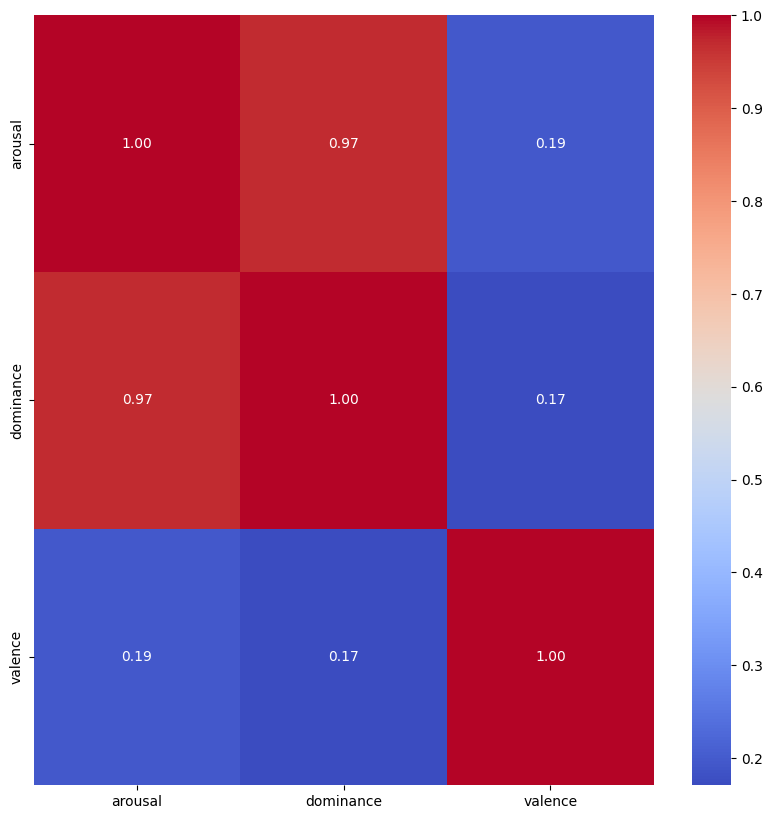

In [5]:
# correlation heatmap

corr = results.drop(columns="subj_id").corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [14]:
# Display the video with highest valence
VIDEOS_FOLDER = "/autofs/thau03a/datasets/c1_muse_perception/raw/videos"

results["valence"] = results["valence"].astype(float)
lowest_valence = results.loc[results["valence"].idxmax()]
lowest_valence

arousal        0.548934
dominance      0.623177
valence        0.867109
subj_id      123.000000
Name: 82, dtype: float64

In [15]:
video_path = os.path.join(VIDEOS_FOLDER, f"{lowest_valence['subj_id'].astype(int)}.mp4")

In [16]:
video_path

'/autofs/thau03a/datasets/c1_muse_perception/raw/videos/123.mp4'